##SARCASM Classification(Sentiment Analysis)

Collection `Data` from JSON

In [1]:
import json

In [9]:
with open("Sarcasm_Headlines_Dataset_v2.json", "r") as f:
  corpas = f.readlines()
f.close()

In [11]:
sentences, labels, urls = [], [], []
for item in corpas:
  item = json.loads(item)
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [12]:
print(len(sentences), len(labels), len(urls))

28619 28619 28619


`Preprocessing` on TEXT

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [15]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

In [16]:
print(padded[0])
print(padded.shape)

[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
(28619, 152)


`Spliting` Data

In [24]:
training_size = 22000
vocab_size = 10000
embedding_dim = 16
max_length = 160
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [50]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

Changing Our Code

In [51]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [52]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [53]:
training_labels.dtype

dtype('int64')

In [54]:
import tensorflow as tf

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')                  
])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 160, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
688/688 - 3s - loss: 0.6702 - accuracy: 0.5972 - val_loss: 0.5830 - val_accuracy: 0.8078
Epoch 2/30
688/688 - 2s - loss: 0.4460 - accuracy: 0.8263 - val_loss: 0.3872 - val_accuracy: 0.8370
Epoch 3/30
688/688 - 3s - loss: 0.3285 - accuracy: 0.8660 - val_loss: 0.3545 - val_accuracy: 0.8473
Epoch 4/30
688/688 - 3s - loss: 0.2783 - accuracy: 0.8893 - val_loss: 0.3378 - val_accuracy: 0.8533
Epoch 5/30
688/688 - 2s - loss: 0.2437 - accuracy: 0.9045 - val_loss: 0.3316 - val_accuracy: 0.8571
Epoch 6/30
688/688 - 2s - loss: 0.2186 - accuracy: 0.9166 - val_loss: 0.3343 - val_accuracy: 0.8577
Epoch 7/30
688/688 - 2s - loss: 0.1966 - accuracy: 0.9249 - val_loss: 0.3423 - val_accuracy: 0.8571
Epoch 8/30
688/688 - 2s - loss: 0.1783 - accuracy: 0.9332 - val_loss: 0.3558 - val_accuracy: 0.8536
Epoch 9/30
688/688 - 2s - loss: 0.1634 - accuracy: 0.9399 - val_loss: 0.3647 - val_accuracy: 0.8524
Epoch 10/30
688/688 - 2s - loss: 0.1519 - accuracy: 0.9440 - val_loss: 0.3789 - val_accuracy: 0.8513

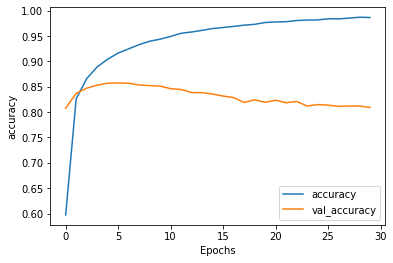

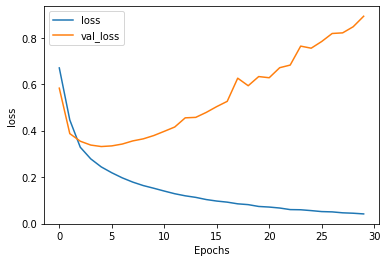

In [59]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [60]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.23265073]
 [0.00755322]]
